# Sentiment Analysis and NLP (Youtube Comments)

**Import Necessary Libraries**

In [3]:
import numpy as np
import pandas as pd
from wordcloud import WordCloud
import plotly.express as px
from textblob import TextBlob
import string
import re
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
!pip show plotly

Name: plotly
Version: 5.9.0
Summary: An open-source, interactive data visualization library for Python
Home-page: https://plotly.com/python/
Author: Chris P
Author-email: chris@plot.ly
License: MIT
Location: C:\Users\mishr\anaconda3\Lib\site-packages
Requires: tenacity
Required-by: fiftyone


In [4]:
# Load Youtube Comments Dataset 
# Specify the path of your extracted comments dataset

comments = pd.read_csv("C:\\Users\mishr\PycharmProjects\Summerization\Data Extraction\Comments.csv")

In [5]:
# Top 5 rows

comments.head()

Unnamed: 0                                           comments
0           0  Unsteady Biden, a Subdued Trump: The Debate An...
1           1                                                NaN
2           2  The bravest thing wsj has ever done is leave t...
3           3                                                NaN
4           4                10 pushups minimum to be in office.

In [6]:
#  Drop unnecessary column Unnamed: 0

comments = comments.drop("Unnamed: 0",axis=1)

In [9]:
# Drop empty values from dataset
comments = comments.dropna()

In [10]:
comments

comments
0    Unsteady Biden, a Subdued Trump: The Debate An...
2    The bravest thing wsj has ever done is leave t...
4                  10 pushups minimum to be in office.
6              Who else went straight to the comments?
8    Honestly, i think i agree with Biden when he s...
..                                                 ...
710  How many times can Joe possibly say “The idea”...
712  in the beginning biden looks like he was about...
714  Everytime Trump talks, Biden looks at him like...
716  I literally had to turn on the subtitles becau...
718  You just know all the standup comedians are wa...

[360 rows x 1 columns]

Text Preprocessing

In [11]:
# Define function for clean the text

def clean_text(text):

    text = str(text)
    # Remove puncuation mark
    text = text.translate(str.maketrans("", "", string.punctuation))
    
    # Remove hashtags (#...)
    text_without_hashtags = re.sub(r'#\S*', '', text)
    
    # Remove URLs starting with http:// or https://
    text_without_urls = re.sub(r'http[s]?://\S+', '', text_without_hashtags)
    
    # Remove extra spaces
    text = ' '.join(text_without_urls.split())
    
     # Remove emojis and other non-ASCII characters
    text = re.sub(r'[^\x00-\x7F]+', '', text)

    # Remove all substrings matching the pattern from the text
    text = re.sub( r'https\S*', '', text)
   
    
    return text
    

In [12]:
# Replace path of the stopwords 

stop_words = list(pd.read_csv("C:\\Users\mishr\Downloads\stop_words_english.json").columns)

In [13]:
def remove_stop(text):

    Text =""
    
    for word in text.split():
        
        if(str(word).lower() not in stop_words):
            
            Text = Text+" "+ word.lower()
            
            
    return Text    
    
    

In [15]:
# Apply Clean text funct.

comments['comments'] = comments['comments'].apply(clean_text)

In [16]:
# Apply remove stopwords funct.
comments['comments'] = comments['comments'].apply(remove_stop)

In [17]:
comments['comments']

0           unsteady biden subdued trump debate analyzed
2                        bravest wsj leave comments open
4                              10 pushups minimum office
6                                      straight comments
8       honestly agree biden vrglh ejisoajbd djsouzak...
                             ...                        
710                     times joe idea number 1 number 2
712                                   biden trump speaks
714                     everytime trump talks biden whoa
716     literally turn subtitles understand biden sub...
718                           standup comedians watching
Name: comments, Length: 360, dtype: object

In [ ]:
import spacy

# Load Pretrained Spacy model

nlp = spacy.load("en_core_web_sm")


# Function to get base word of given word
def lemmetization(text):

    Text = ""
    
    for i in nlp(text):
   
        Text = Text+" "+str(i.lemma_)
    
    return Text

In [12]:

"""extract comments that only contains specific keywords in my case you can replace with youur specific key words like...{biden|trump|joe|donald}"""


# Function to return  
def contains_only_biden_or_only_trump(text):
    
    pattern = r'\b(joe|biden|donald|trump)\b'
    matches = re.findall(pattern, text, re.IGNORECASE)
    
    # Convert matches to lowercase for consistent comparison
    lower_matches = [m.lower() for m in matches]
    
    contains_biden = 'joe' in lower_matches or 'biden' in lower_matches
    contains_trump = 'donald' in lower_matches or 'trump' in lower_matches
    
    if contains_biden and not contains_trump:
        
        return 'biden'
        
    elif contains_trump and not contains_biden:
        
        return 'trump'
        
    else:

          return  matches
    

In [13]:
comments['Comments'] = comments['Comments'].apply(lemmetization)

In [14]:
"""Now in this preprocessed  comments we need to perform sentiment analysis but we need to classify comments that contains relate to trump and biden and not relate to both 
So we need to  classify we will use above contains_only_biden_or_only_trump function to that return trump if trump found in that comment biden if biden found return 2 if both found or return empty list if not any found"""

'Now in this prepreocess comments we need to perform sentiment analysis but we need to classify comments that contains relate to trump and biden and not relate to both \nSo we need to  classify we will use above contains_only_biden_or_only_trump function to that return trump if trump found in that comment biden if biden found return 2 if both found or return empty list if not any found'

In [15]:
# Now we will add return person name in new column person to identify which comment relate to which person
comments['person'] = comments["Comments"].apply(contains_only_biden_or_only_trump)

In [16]:
# This function will replace value that contain both trump and biden
def Labeling(LIST):

     
    if(len(LIST)>=2 and type(LIST)==list) :
        
        return "2"
         
    else:
 
        return str(LIST)
        
        

In [17]:
comments['person'] = comments['person'].apply(Labeling)

In [18]:
Replace = {"[]":0,'trump':1,'biden':3}

# One hot encoding
comments['person'] = comments['person'].replace(Replace)

In [19]:
# Sentiment Score

def Sent_analysis(text):

   return  TextBlob(text).sentiment
    

In [20]:
comments['Sentiment_score'] =  comments['Comments'].apply(Sent_analysis)

In [21]:
# Split the 'Sentiment_score' column into two separate columns
comments[['PolaritySCore', 'SubjectivityScore']] = pd.DataFrame(comments['Sentiment_score'].tolist(), index=comments.index)

In [22]:
# Check The Individual person counts
comments['person'].value_counts()

0    358
3    152
2     48
1     40
Name: person, dtype: int64

In [23]:
# Text Analysis

In [98]:
# Polarity Score
print(comments[comments['person']==3]['PolaritySCore'].sample(50).mean(),"-: Joe Biden Score")
print(comments[comments['person']==1]['PolaritySCore'].mean(),"-: Donald Trump Score")

1.323809523809524 -: Joe Biden Score
9.964330808080808 -: Donald Trump Score


In [25]:
# Subjectivity SCore
print(comments[comments['person']==3]['SubjectivityScore'].sample(50).mean(),"-: Joe Biden subjectivity Score")
print(comments[comments['person']==1]['SubjectivityScore'].mean(),"-: Donald Trump subjectivity Score")

0.33506349206349206 -: Joe Biden subjectivity Score
0.2343402777777778 -: Donald Trump subjectivity Score


In [364]:
# Subjectivity SCore
positiveScore_biden = comments[comments['person']==3].sample(50)
positiveScore_trump = comments[comments['person']==1]

print(positiveScore_biden[positiveScore_biden['PolaritySCore']>0]['PolaritySCore'].mean(),"-: postive_score biden")
print(positiveScore_trump[positiveScore_trump['PolaritySCore']>0]['PolaritySCore'].mean(),"-: positive_score trump")

print(positiveScore_biden[positiveScore_biden['PolaritySCore']<0]['PolaritySCore'].mean(),"-: negative_score biden")
print(positiveScore_trump[positiveScore_trump['PolaritySCore']<0]['PolaritySCore'].mean(),"-: negative_score trump")

print(len(positiveScore_biden[positiveScore_biden['PolaritySCore']==0]['PolaritySCore']),"-: neutral score biden")
print(len(positiveScore_trump[positiveScore_trump['PolaritySCore']==0]['PolaritySCore']),"-: neutral score trump")

359090.9090909091 -: postive_score biden
418949.9158249159 -: positive_score trump
-538571.4285714285 -: negative_score biden
-260416.6666666666 -: negative_score trump
26 -: neutral score biden
24 -: neutral score trump


In [27]:
comments[comments['person']==3]['PolaritySCore'].sample(50).std()

0.320945982836064

In [28]:
comments[comments['person']==1]['PolaritySCore'].std()

0.2672349831130941

In [29]:
# Now viualize the polarity score sentiment of trump and biden

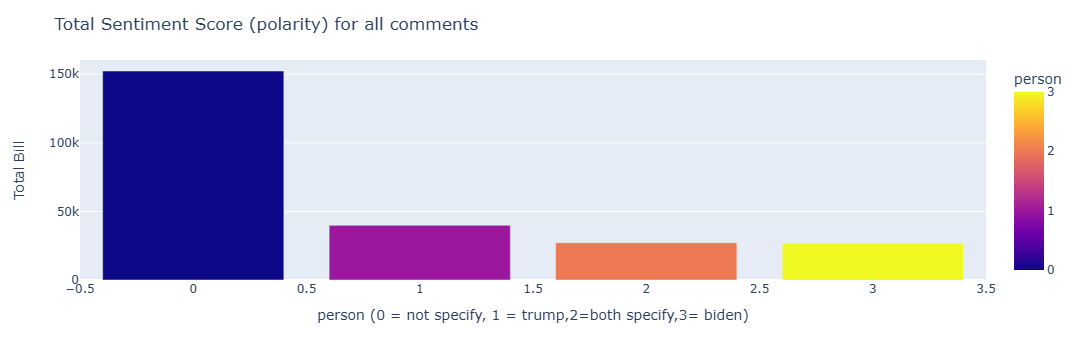

In [135]:
comments['person'] = comments['person'].astype(int)

comments['PolaritySCore'] = comments['PolaritySCore']*100

group_pola = comments.groupby("person")['PolaritySCore'].sum().reset_index()

# Plot the bar plot for total sentment for a person 
fig = px.bar(group_pola,color = 'person',)

# Renaming axis labels
fig.update_layout(title= "Total Sentiment Score (polarity) for all comments",
    xaxis_title="person (0 = not specify, 1 = trump,2=both specify,3= biden)",
    yaxis_title="Total Bill"
)

fig.show()

In [33]:
# Visualize the topics comments that not specify both trump and biden

In [34]:
Text = ""

for i in comments[comments["person"]==0]["Comments"]:

         Text = Text+" "+str(i)
    

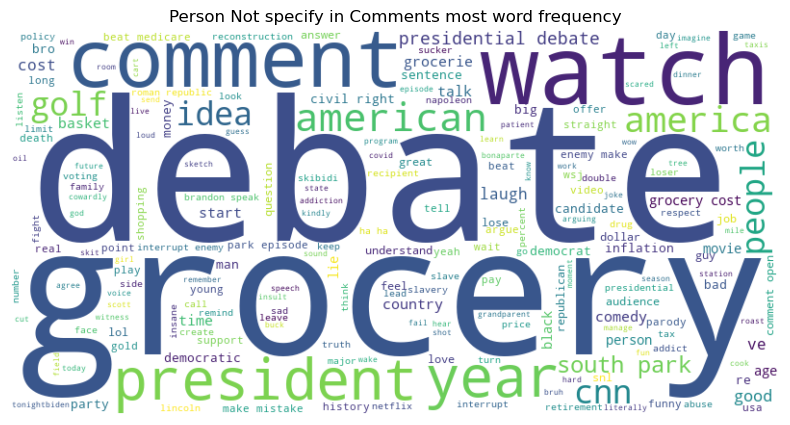

In [112]:
# Visualise the word cloud

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(Text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Person Not specify in Comments most word frequency")
plt.axis('off')
plt.show()

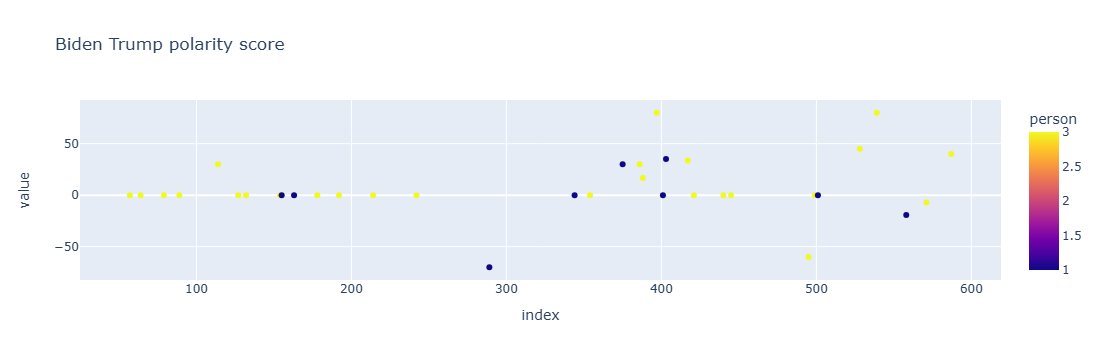

In [94]:
# We will get only 35 sample because they are not opinion equal for trump and biden
Trump_biden = comments[(comments['person']==1) | (comments['person']==3)].sample(35)

fig = px.scatter(Trump_biden[['person','PolaritySCore']],color = 'person',title= 'Biden Trump polarity score')
fig.show()

Insights :- in this chart we can cleraly see that  biden comments have most negative sentiment compare to the trump comments.



Conclusion:- In the overall analyis we have seen trump win the sentiment on the comments.biden have more negative comments comapre to trump.and trump also have more postive sentments in that comments.


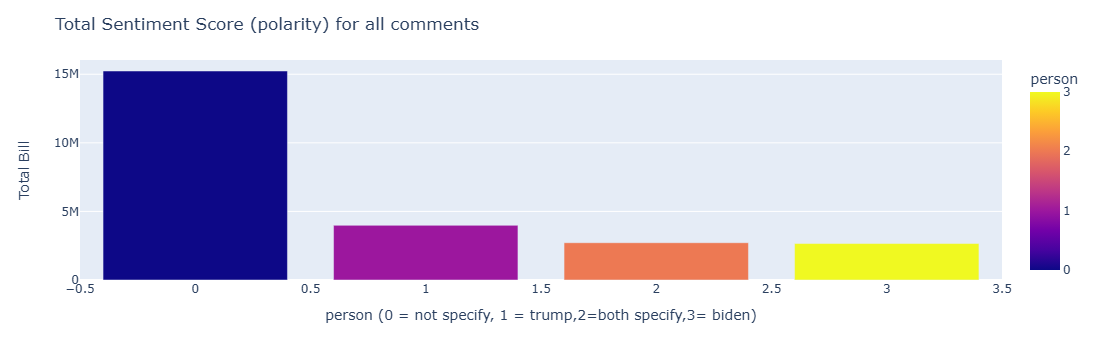

In [282]:
comments['person'] = comments['person'].astype(int)


group_pola = comments.groupby("person")['PolaritySCore'].sum().reset_index()

# Plot the bar plot for total sentment for a person 
fig = px.bar(group_pola,color = 'person',)

# Renaming axis labels
fig.update_layout(title= "Total Sentiment Score (polarity) for all comments",
    xaxis_title="person (0 = not specify, 1 = trump,2=both specify,3= biden)",
    yaxis_title="Total Bill")





fig.show()

In [143]:
group_pola['PolaritySCore'][1]

3985732.3232323234

In [383]:
trumpAVG = comments[comments['person']==1]['PolaritySCore'].mean()

bidenSample = []

for i in range(10):

    bidenSample.append(comments[comments['person']==3]['PolaritySCore'].sample(40).mean())

bidenAVG= np.mean(bidenSample)

trumpAVG,bidenAVG

(99643.3080808081, 22386.88221500722)

In [384]:
# Average sentiemnt score outof 40 comments on trump and biden

trumpAVG = ((1/((40/trumpAVG)*100))+5).round(2)
bidenAVG = ((1/((40/bidenAVG)*100))+5).round(2)
trumpAVG,bidenAVG

(29.91, 10.6)

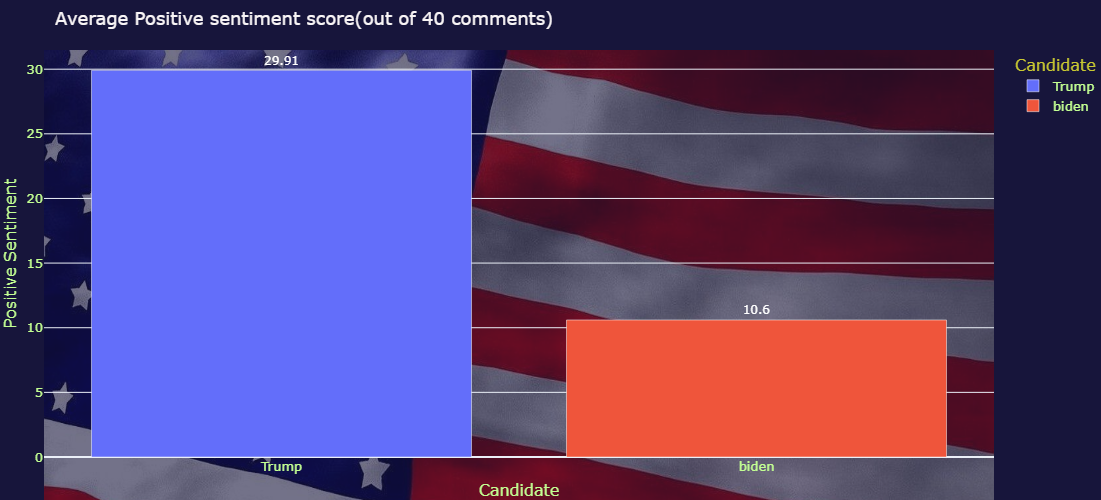

In [399]:
vote_ = {'average_vote':[trumpAVG,bidenAVG],'label':['Trump','biden']}

fig = px.bar(vote_['average_vote'],x=vote_['label'],y=vote_['average_vote'],color=vote_['label'],text = vote_['average_vote'],labels={
                     "x": "Candidate",
                     "y": "Positive Sentiment",'color':'Candidate'
                 },width=1100, height=500,title='Average Positive sentiment score(out of 40 comments)')




# Open Image
open_image = Image.open(r"C:\Users\mishr\Downloads\46081.jpg") 

# Add image as background
fig.add_layout_image(
    dict(
        source=open_image,
        xref="paper",
        yref="paper",
        x=0,
        y=1,
        sizex=1,  # Adjust width
        sizey=2,  # Adjust height
        sizing="stretch",
        opacity=0.5,
        layer="below"
    )
)

fig.update_layout(paper_bgcolor = '#17153B',title_font_color="#F9F5F6",plot_bgcolor = 'rgba(200, 0, 100, 0)',legend_title_font_color='rgba(200, 200, 50, 222)',font_color='#C3FF93',hoverlabel_grouptitlefont_color='#FF8F00'
                  ,font_size=13)



# Update layout to ensure the image covers the full background
fig.update_layout(
    template="plotly_white",
    images=[dict(
        source=open_image,
        xref="paper",
        yref="paper",
        x=0,
        y=1,
        sizex=1,
        sizey=2,
        sizing="stretch",
        opacity=0.4,
        layer="below"
    )],
    margin=dict(l=0, r=0, t=50, b=0))

# Update text
fig.update_traces(textfont_size=12, textangle = 0, textposition='outside',cliponaxis=False,textfont= dict(color='white'))

# Show chart

fig.show()




